In [26]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [27]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [29]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [30]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables

In [31]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [32]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [33]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [34]:
# Find the most recent date in the data set. (Slightly different)
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

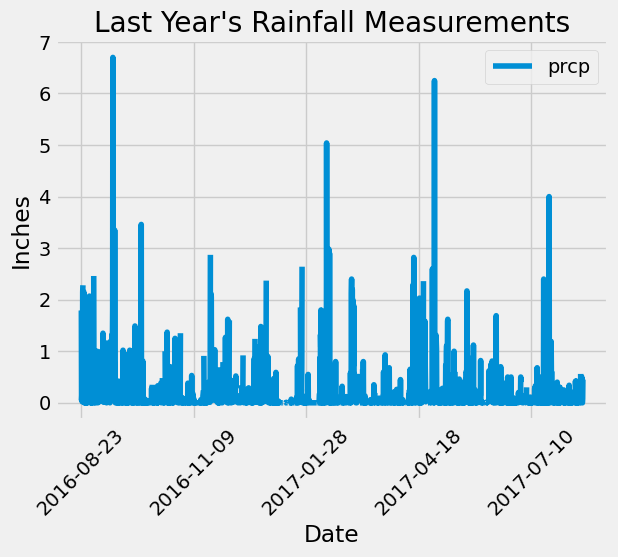

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_year = '2016-08-22'

# Perform a query to retrieve the data and precipitation scores
last_year = session.query(measurement).filter(measurement.date > date_year)
results=last_year.all()

measurement_list = [(r.station, r.date, r.prcp, r.tobs) for r in results]

# # Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_df = pd.DataFrame(measurement_list, columns=['station','date','prcp','tobs'])

last_year_df.drop(columns=['station','tobs'], inplace=True)

# # Sort the dataframe by date
last_year_df.sort_values(by= 'date', ascending= True, inplace= True)



# Use Pandas Plotting with Matplotlib to plot the data
last_year_df.plot(x= 'date', y= ['prcp'])
plt.xlabel("Date")
plt.ylabel('Inches')

plt.tight_layout()
plt.xticks(rotation=45)
plt.title("Last Year's Rainfall Measurements")
plt.grid(True)
plt.legend()
plt.show()



In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.station).count()
total_stations

9

In [52]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

stations_activity = session.query(measurement.station, func.count(measurement.tobs).label('count')).group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).all()
stations_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temp = session.query(measurement.tobs).filter(measurement.station == "USC00519281")
temp = station_temp.all()

temp_list = [(t.tobs) for t in temp]

max_temp = max(temp_list)
min_temp = min(temp_list)
ave_temp = sum(temp_list)/len(temp_list)

print(max_temp, min_temp, ave_temp)

85.0 54.0 71.66378066378067


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


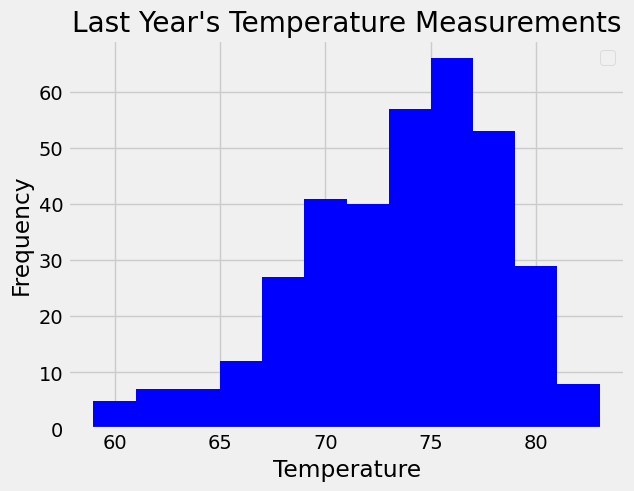

In [63]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temp = session.query(measurement).filter(measurement.date > date_year).filter(measurement.station == "USC00519281")
output= last_year_temp.all()

output_list = [(p.station, p.date, p.prcp, p.tobs) for p in output]

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_temp_df = pd.DataFrame(output_list, columns=['station','date','prcp','tobs'])
last_year_temp_df.drop(columns=["prcp", "station"], inplace=True)


# # # Use Pandas Plotting with Matplotlib to plot the data
plt.hist(last_year_temp_df['tobs'], bins=12,color="blue")

plt.xlabel("Temperature")
plt.ylabel('Frequency')
plt.title("Last Year's Temperature Measurements")
plt.grid(True)
plt.legend()
plt.show()

# Close Session

In [64]:
# Close Session
session.close()